# Women's Tennis Matches

## Objective

#### Problem Statement: 
Women's tennis is one of the fastest-growing sports globally, with consistent gains in viewership over the past several years. According to Forbes, viewership for the sport has nearly tripled compared to last year, which has led to a 20% year-to-date increase in sponsorships within the Women's Tennis Association (WTA), as reported by The Drum. This surge in popularity has created exciting opportunities for sponsors, who are now more focused than ever on identifying the most promising players to support.

For my final project, I aim to develop a predictive model that accurately determines the winner of a women's tennis match using a dataset from the WTA. This dataset includes critical match factors such as serving ability, player rankings, and other performance metrics. By analyzing these variables, the model will help uncover key factors contributing to a player's likelihood of winning.

This predictive model can be a valuable resource for stakeholders in the sport. Sponsors can use the insights to guide decisions on which players to back, while coaches can better understand which aspects of a player's performance are most critical for success. The successful development of this model will enhance predictive capabilities in women's tennis and provide actionable insights to drive strategic decision-making in a sport that is rapidly growing in influence and reach.

#### Dataset Description:

##### Context
The Women's Tennis Association (WTA) serves as the primary organizing body for women's professional tennis, overseeing its worldwide tour. The WTA provides a wealth of data on individual players, tournament matches, results, and rankings. Jeff Sackmann has compiled and scraped this data from the WTA website, organizing it into easily accessible datasets. This makes it possible to analyze detailed match statistics and player performance across various years and tournaments.

##### Content
The dataset used in this project is sourced from Jeff Sackmann's GitHub repository on Kaggle, where he shares comprehensive tennis-related datasets. No alterations were made to the original dataset; it was directly downloaded and organized into subdirectories for easier navigation. The dataset includes information about tournaments, match results, and player statistics such as serve performance, rankings, and ages. The data covers matches from 2006 onwards, with a few missing entries for matches before that year. Each row represents a match, with over 40 columns detailing specific attributes of the match, including the tournament, surface, player rankings, and performance metrics.

##### Format
The dataset is in CSV format and contains a wide range of variables to aid in predictive analysis, including:

Tournament Details: Tournament ID, name, surface type, draw size, level, and date.
Player Details: Player names, rankings, ranking points, hand (right or left), age, and nationality.
Match Statistics: Aces, double faults, serve points, breakpoints faced/saved, and match duration.

##### Challenges
Some challenges in using this dataset include missing data for matches prior to 2006 and the possibility of null or incomplete values in specific columns. Additionally, the dataset contains numerous variables that will require cleaning and preprocessing to ensure consistent formats and usability.

Despite these challenges, the dataset provides rich and detailed information that can be leveraged to create an effective predictive model for tennis match outcomes.


## Imports and Analysis

In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
tennis = pd.read_csv("WTA_matches.csv")
tennis.shape

(2277, 49)

In [31]:
tennis.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,I,20230102,298,202468,NaN,NaN,...,43.0,20.0,12.0,9.0,3.0,9.0,3.0,4691.0,27.0,1528.0
1,2023-9900,United Cup,Hard,18,I,20230102,297,201619,NaN,NaN,...,32.0,14.0,6.0,8.0,5.0,11.0,11.0,2417.0,54.0,951.0
2,2023-9900,United Cup,Hard,18,I,20230102,294,202468,NaN,NaN,...,26.0,10.0,5.0,8.0,2.0,7.0,3.0,4691.0,1.0,11085.0
3,2023-9900,United Cup,Hard,18,I,20230102,293,201619,NaN,NaN,...,47.0,29.0,5.0,9.0,4.0,8.0,11.0,2417.0,48.0,1030.0
4,2023-9900,United Cup,Hard,18,I,20230102,290,203354,NaN,NaN,...,53.0,37.0,22.0,17.0,2.0,9.0,27.0,1528.0,6.0,3871.0


In [32]:
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          2277 non-null   object 
 1   tourney_name        2277 non-null   object 
 2   surface             2277 non-null   object 
 3   draw_size           2277 non-null   int64  
 4   tourney_level       2277 non-null   object 
 5   tourney_date        2277 non-null   int64  
 6   match_num           2277 non-null   int64  
 7   winner_id           2277 non-null   int64  
 8   winner_seed         917 non-null    float64
 9   winner_entry        364 non-null    object 
 10  winner_name         2277 non-null   object 
 11  winner_hand         2277 non-null   object 
 12  winner_ht           1805 non-null   float64
 13  winner_ioc          2277 non-null   object 
 14  winner_age          2274 non-null   float64
 15  loser_id            2277 non-null   int64  
 16  loser_

In [33]:
tennis.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [34]:
tennis['winner_ht'].min()

157.0

In [35]:
tennis['winner_ht'].max()

188.0

In [36]:
tennis['w_1stWon'].max()

69.0

#### Additional Dataset Information
Variable Prefix Explanation
Many variables in the dataset are prefixed with either "w" or "l", which denote the winner and loser of the match, respectively. For example:

w_ace refers to the number of aces served by the winner.
l_df refers to the number of double faults committed by the loser.
Key Variable Explanations
Some columns have abbreviated or cryptic names. Below are explanations of a few significant variables:

bpSaved: The number of breakpoints saved by the respective player during their service games.
1stWon: The percentage of points won by a player on their first serve.
1stIn: The percentage of first serves successfully landed in play.
ioc: The player’s country of origin (International Olympic Committee code).
2ndWon: The percentage of points won by a player on their second serve.
These detailed variables allow for a nuanced analysis of player performance during a match and provide critical inputs for building predictive models.

To start, let's look over a box plot that compares the distribution of rank points between winners and losers.

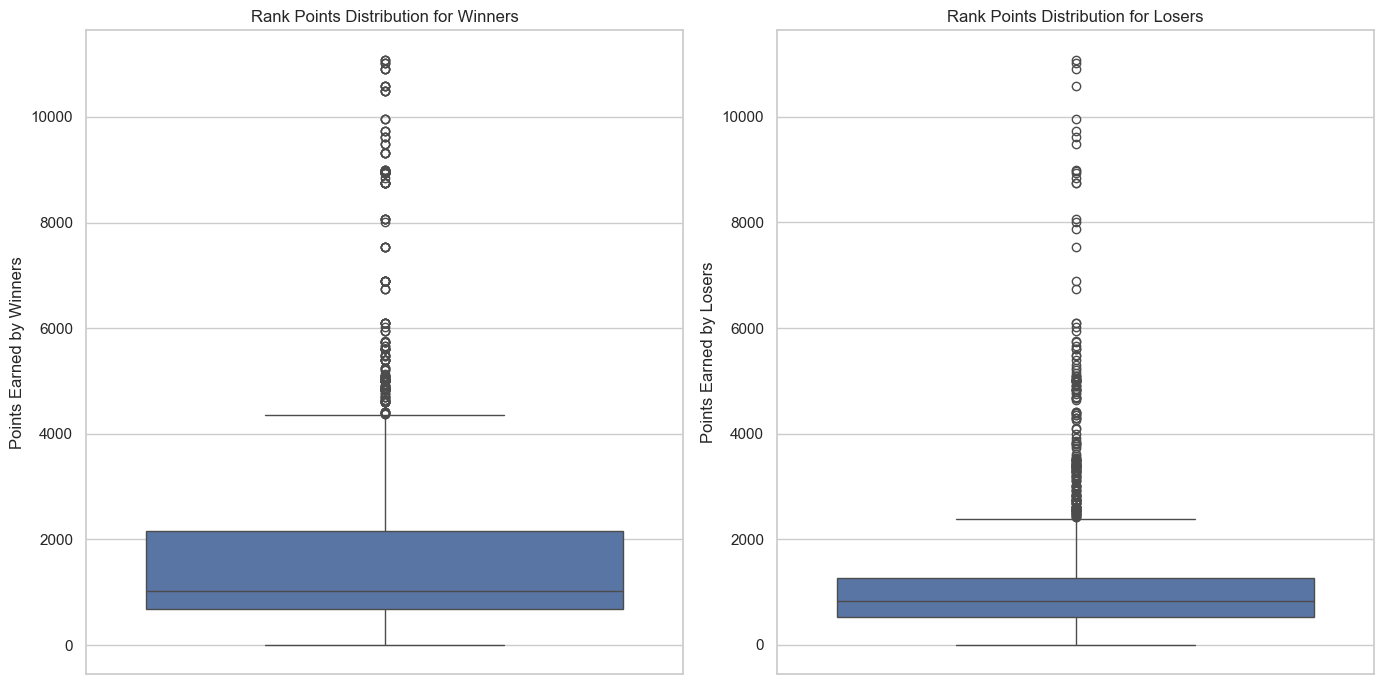

In [37]:
sns.set(style="whitegrid")

# Box plots for the distribution of rank points for winners and losers
plt.figure(figsize=(14, 7))

# Box plot for winner rank points
plt.subplot(1, 2, 1)
sns.boxplot(y='winner_rank_points', data=tennis)
plt.title('Rank Points Distribution for Winners')
plt.ylabel('Points Earned by Winners')

# Box plot for loser rank points
plt.subplot(1, 2, 2)
sns.boxplot(y='loser_rank_points', data=tennis)
plt.title('Rank Points Distribution for Losers')
plt.ylabel('Points Earned by Losers')

# Show the plots
plt.tight_layout()
plt.show()


The distribution of rank points for winners, displayed on the left, reveals that winners generally have higher median rank points. This suggests that a player’s past winning record, as reflected in their rank points, could be a strong predictor of future victories.

On the right, the distribution for losers shows a lower median rank point value. This aligns with the assumption that a lower track record, as indicated by rank points, may contribute to a loss.

These patterns indicate that a player’s rank points could serve as a reliable indicator of the likely victor in a women's tennis match.

Below is two patterns I noticed in the data:

In [38]:
# Filter columns for winners' and losers' aces
winner_aces = tennis['w_ace']
loser_aces = tennis['l_ace']

# Calculate statistics for winners and losers
stats = {
    'Metric': ['Mean', 'Median', 'Min', 'Max'],
    'Winner Aces': [
        winner_aces.mean(),
        winner_aces.median(),
        winner_aces.min(),
        winner_aces.max()
    ],
    'Loser Aces': [
        loser_aces.mean(),
        loser_aces.median(),
        loser_aces.min(),
        loser_aces.max()
    ]
}

# Convert the stats dictionary to a DataFrame for a tabular view
stats_tennis = pd.DataFrame(stats)

# Display the statistics
print(stats_tennis)


   Metric  Winner Aces  Loser Aces
0    Mean     3.389731    2.201956
1  Median     3.000000    1.000000
2     Min     0.000000    0.000000
3     Max    21.000000   19.000000


The results suggest an interesting relationship between aces and match outcomes, with winners serving a higher average number of aces (3.39) compared to losers (2.20), and a median of 3.0 for winners versus 1.0 for losers, indicating a notable difference. While both winners and losers can have matches with zero aces, the maximum number of aces served by winners (21) slightly exceeds that of losers (19), suggesting some outlier matches where aces play a critical role. However, the overall variation and subtle differences in these metrics indicate that aces alone may not have a strong or consistent correlation with winning. Since there are other variables in the dataset that likely yield higher correlations and show more pronounced disturbances in the data, we will not explore this variable further.

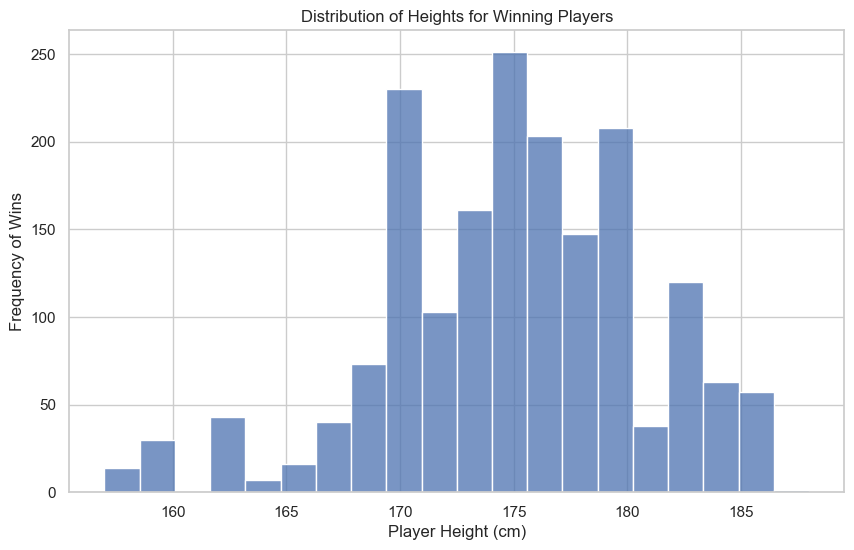

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=tennis, x='winner_ht', bins=20)
plt.title('Distribution of Heights for Winning Players')
plt.xlabel('Player Height (cm)')
plt.ylabel('Frequency of Wins')
plt.show()


As observed in the histogram, height appears to have an impact on winning in women’s tennis. Taller players seem to have a significantly higher number of wins compared to shorter players, suggesting that height could be a contributing factor to success in the sport.

I am creating a heatmap now to look over the correlation factors of the dataset.

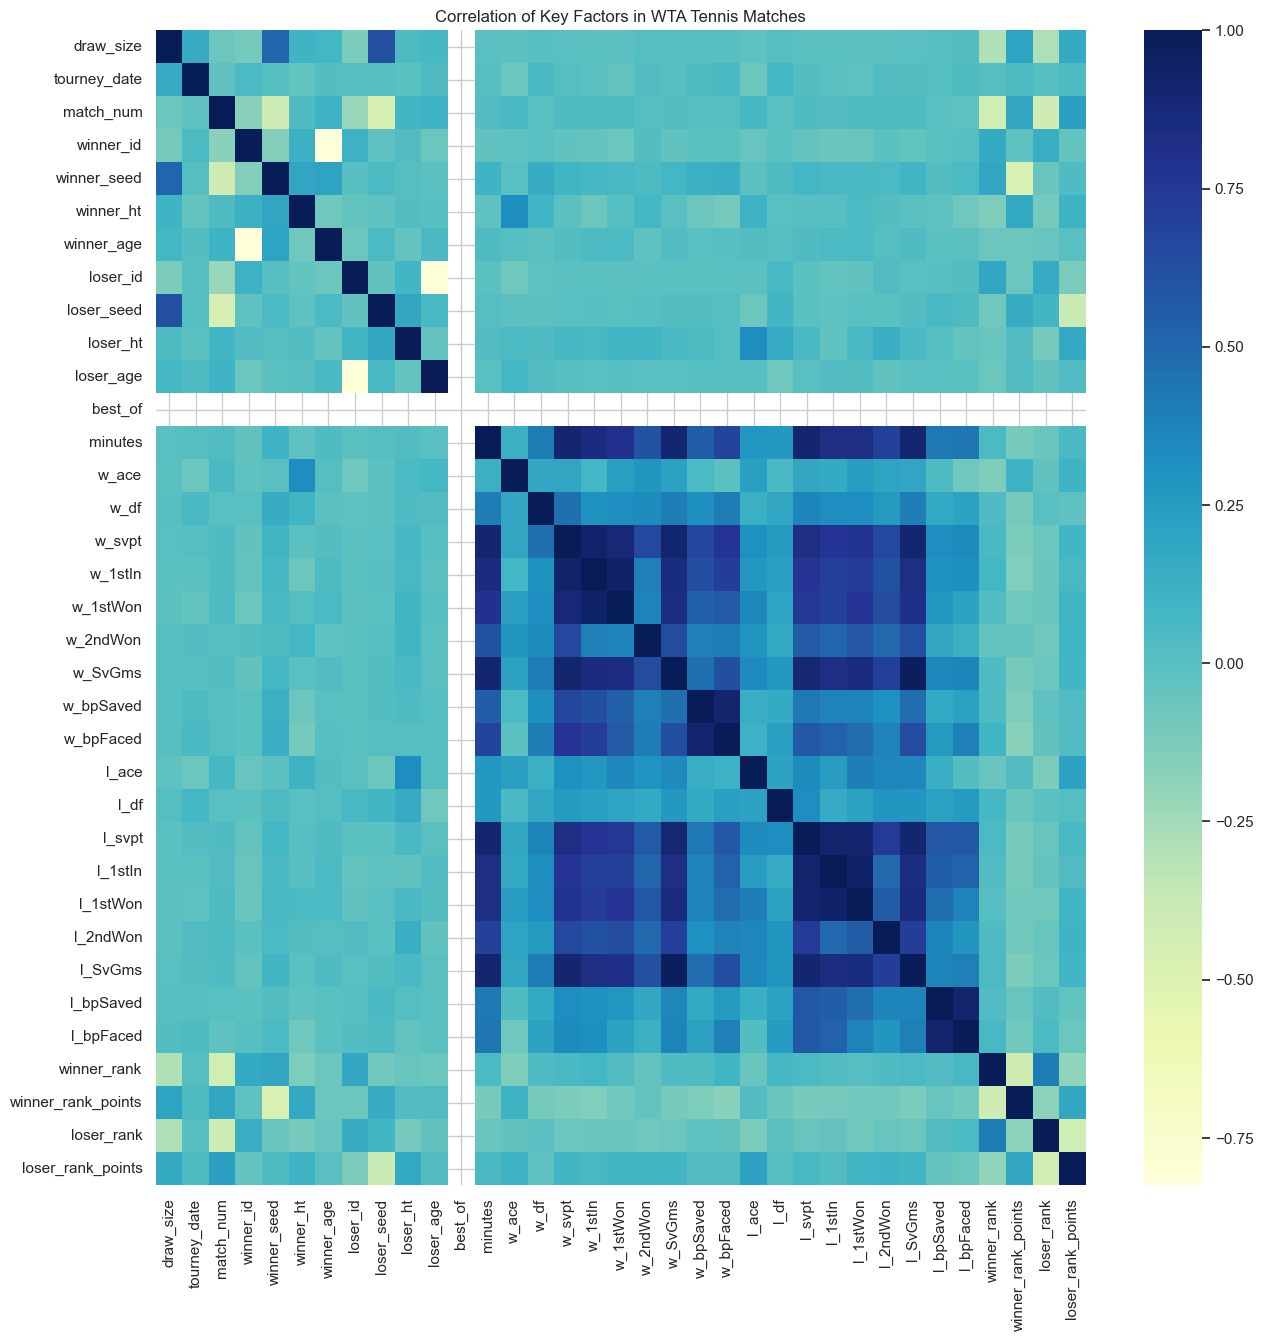

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns and calculate the correlation matrix
numeric_cols = tennis.select_dtypes(include='number').columns
correlation_matrix = tennis[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu')  
plt.title("Correlation of Key Factors in WTA Tennis Matches")  
plt.show()


The analysis of the heatmap in the WTA Matches dataset reveals that key factors such as serve performance, player ranking, match gameplay, and height play a significant role in the dataset.








## Cleanup & Adjustments

In [41]:
tennis = tennis.drop(columns=['score','tourney_name','winner_name',
                      'loser_name','minutes', 'l_1stWon', 'l_2ndWon',
                      'l_ace', 'l_svpt', 'l_bpFaced','l_df', 'l_bpSaved',
                      'w_1stWon','w_2ndWon',
                      'w_ace', 'w_svpt','w_bpFaced', 'w_bpSaved','w_df'])
print("remained features ", tennis.columns)

remained features  Index(['tourney_id', 'surface', 'draw_size', 'tourney_level', 'tourney_date',
       'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age',
       'best_of', 'round', 'w_1stIn', 'w_SvGms', 'l_1stIn', 'l_SvGms',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')


What I’ve done is eliminate factors that wouldn’t be available until after a match takes place, ensuring that predictions are based solely on data we have prior to the match. However, it's important to note that I’m still retaining service performance metrics, as these are independent factors.








In [42]:
# Calculate the percentage of missing values for each column
missing_percent = tennis.isnull().mean() * 100

# Identify and drop columns with more than 50% missing values directly
columns_to_drop = missing_percent[missing_percent > 50].index
tennis.drop(columns=columns_to_drop, inplace=True)

# Print the remaining columns
print(tennis.columns)

Index(['tourney_id', 'surface', 'draw_size', 'tourney_level', 'tourney_date',
       'match_num', 'winner_id', 'winner_hand', 'winner_ht', 'winner_ioc',
       'winner_age', 'loser_id', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'best_of', 'round', 'w_1stIn', 'w_SvGms', 'l_1stIn',
       'l_SvGms', 'winner_rank', 'winner_rank_points', 'loser_rank',
       'loser_rank_points'],
      dtype='object')


In the code above, I’m removing columns that have more than half of their cells missing, and eliminating any empty cells within the factors we previously identified as important.








In [43]:
tennis.dropna(subset=['winner_rank_points', 'loser_rank_points', 'winner_rank', 'loser_rank', 
                      'l_1stIn', 'l_SvGms', 'w_1stIn', 'w_SvGms'], inplace=True)
tennis.reset_index(drop=True, inplace=True)
tennis

,tourney_id,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_hand,winner_ht,winner_ioc,...,best_of,round,w_1stIn,w_SvGms,l_1stIn,l_SvGms,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,Hard,18,I,20230102,298,202468,R,170.0,USA,...,3,F,24.0,9.0,43.0,9.0,3.0,4691.0,27.0,1528.0
1,2023-9900,Hard,18,I,20230102,297,201619,R,178.0,USA,...,3,F,38.0,9.0,32.0,8.0,11.0,2417.0,54.0,951.0
2,2023-9900,Hard,18,I,20230102,294,202468,R,170.0,USA,...,3,SF,29.0,8.0,26.0,8.0,3.0,4691.0,1.0,11085.0
3,2023-9900,Hard,18,I,20230102,293,201619,R,178.0,USA,...,3,SF,38.0,9.0,47.0,9.0,11.0,2417.0,48.0,1030.0
4,2023-9900,Hard,18,I,20230102,290,203354,L,160.0,ITA,...,3,SF,75.0,16.0,53.0,17.0,27.0,1528.0,6.0,3871.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,2023-560,Hard,128,G,20230828,222,201619,R,178.0,USA,...,3,QF,54.0,9.0,27.0,8.0,17.0,2290.0,9.0,3401.0
2031,2023-560,Hard,128,G,20230828,223,214544,R,182.0,BLR,...,3,QF,26.0,9.0,19.0,8.0,2.0,8746.0,23.0,1823.0
2032,2023-560,Hard,128,G,20230828,224,221103,R,175.0,USA,...,3,SF,33.0,11.0,42.0,11.0,6.0,4595.0,10.0,2995.0
2033,2023-560,Hard,128,G,20230828,225,214544,R,182.0,BLR,...,3,SF,64.0,17.0,76.0,15.0,2.0,8746.0,17.0,2290.0


Above, this code removes any rows with missing values in the specified columns related to rankings and serve performance. It then resets the index of the dataset, dropping the old index and reorganizing the rows sequentially.








Below I am making the tournament date-related items into separate integers so that we don't run into any errors in the future.

In [44]:
# Extracting year and month from 'tourney_date' using string slicing and converting to integers
tennis['tourney_year'] = tennis['tourney_date'].astype(str).str[:4].astype(int)
tennis['tourney_month'] = tennis['tourney_date'].astype(str).str[4:6].astype(int)

# Dropping the 'tourney_date' column
tennis.drop('tourney_date', axis=1, inplace=True)

# Displaying the first 6 rows of the DataFrame
tennis.head(6)

,tourney_id,surface,draw_size,tourney_level,match_num,winner_id,winner_hand,winner_ht,winner_ioc,winner_age,...,w_1stIn,w_SvGms,l_1stIn,l_SvGms,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year,tourney_month
0,2023-9900,Hard,18,I,298,202468,R,170.0,USA,28.8,...,24.0,9.0,43.0,9.0,3.0,4691.0,27.0,1528.0,2023,1
1,2023-9900,Hard,18,I,297,201619,R,178.0,USA,27.8,...,38.0,9.0,32.0,8.0,11.0,2417.0,54.0,951.0,2023,1
2,2023-9900,Hard,18,I,294,202468,R,170.0,USA,28.8,...,29.0,8.0,26.0,8.0,3.0,4691.0,1.0,11085.0,2023,1
3,2023-9900,Hard,18,I,293,201619,R,178.0,USA,27.8,...,38.0,9.0,47.0,9.0,11.0,2417.0,48.0,1030.0,2023,1
4,2023-9900,Hard,18,I,290,203354,L,160.0,ITA,29.1,...,75.0,16.0,53.0,17.0,27.0,1528.0,6.0,3871.0,2023,1
5,2023-9900,Hard,18,I,289,214459,R,NaN,ITA,24.0,...,31.0,8.0,34.0,9.0,54.0,951.0,199.0,333.0,2023,1


## Encoding and Splitting into Train and Test

The key step in this analysis is to separate the data for each match into two distinct sections, one for each player. Since the dataset currently combines information for both players, the columns will be renamed to represent the 'first player' and 'second player'. This restructuring will allow for the assignment of binary outcomes (1 or 0) for each player, indicating a win or loss, which is crucial for accurately modeling and predicting individual player performance.








In [45]:
tennis = tennis.rename(columns={"loser_age": "first_age", "loser_hand": "first_hand",
                        "loser_ht": "first_ht", "loser_id": "first_id", "loser_ioc": "first_ioc",
                        "loser_rank": "first_rank", "loser_rank_points": "first_rank_points",
                         "l_1stIn": 'first_1stIn', "l_SvGms": "first_SvGms",
                
                        "winner_age": "second_age", "winner_hand": "second_hand",
                        "winner_ht": "second_ht", "winner_id": "second_id", "winner_ioc": "second_ioc",
                        "winner_rank": "second_rank", "winner_rank_points": "second_rank_points",
                        "w_1stIn": "second_1stIn", "w_SvGms": "second_SvGms"
                       },)

A limitation of this method is that it creates two entries for each match, effectively doubling the size of the dataframe. This significant increase in data size may lead to slower computation times.








In [46]:
copy_2_tennis = tennis.copy()


first_player_cols = ['first_age', 'first_hand', 'first_ht', 'first_id', 'first_ioc', 'first_rank', 'first_rank_points', 'first_1stIn', 'first_SvGms']
second_player_cols = ['second_age', 'second_hand', 'second_ht', 'second_id', 'second_ioc', 'second_rank', 'second_rank_points', 'second_1stIn', 'second_SvGms']

# Swapping the 'first_player' and 'second_player' columns in the copied DataFrame
for first_col, second_col in zip(first_player_cols, second_player_cols):
    copy_2_tennis[first_col], copy_2_tennis[second_col] = copy_2_tennis[second_col], copy_2_tennis[first_col]

In [47]:
tennis['label'] = 0
copy_2_tennis['label'] = 1
tennis = pd.concat([tennis,copy_2_tennis])
tennis = tennis.sample(frac=1).reset_index(drop=True)

This code above adds a new column 'label' with a value of 0 for the original tennis dataset and 1 for the modified dataset (copy_2_tennis). It then combines both datasets, shuffles the rows randomly, and resets the index.







This code below encodes categorical variables in the tennis dataset using LabelEncoder and applies one-hot encoding to the surface column. It then imputes missing values in the dataset by replacing them with the mean value of each column using SimpleImputer. The dataset is updated with these transformations.








In [48]:
encoder = LabelEncoder()
for column in ['first_hand', 'second_hand', 'first_ioc', 'second_ioc', 'tourney_level', 'tourney_id', 'round']:
    tennis[column] = encoder.fit_transform(tennis[column].astype(str))

# For the 'surface' column, use pd.get_dummies for one-hot encoding
surface_dummies = pd.get_dummies(tennis['surface'].astype(str), prefix='surface')
tennis = pd.concat([tennis.drop('surface', axis=1), surface_dummies], axis=1)

imputer = SimpleImputer(strategy='mean')
tennis_imputed = pd.DataFrame(imputer.fit_transform(tennis), columns=tennis.columns)
tennis = tennis_imputed.copy()

Since I made some changes within the dataset, I wanted to recheck the essential factors of correlation now.

<Axes: >

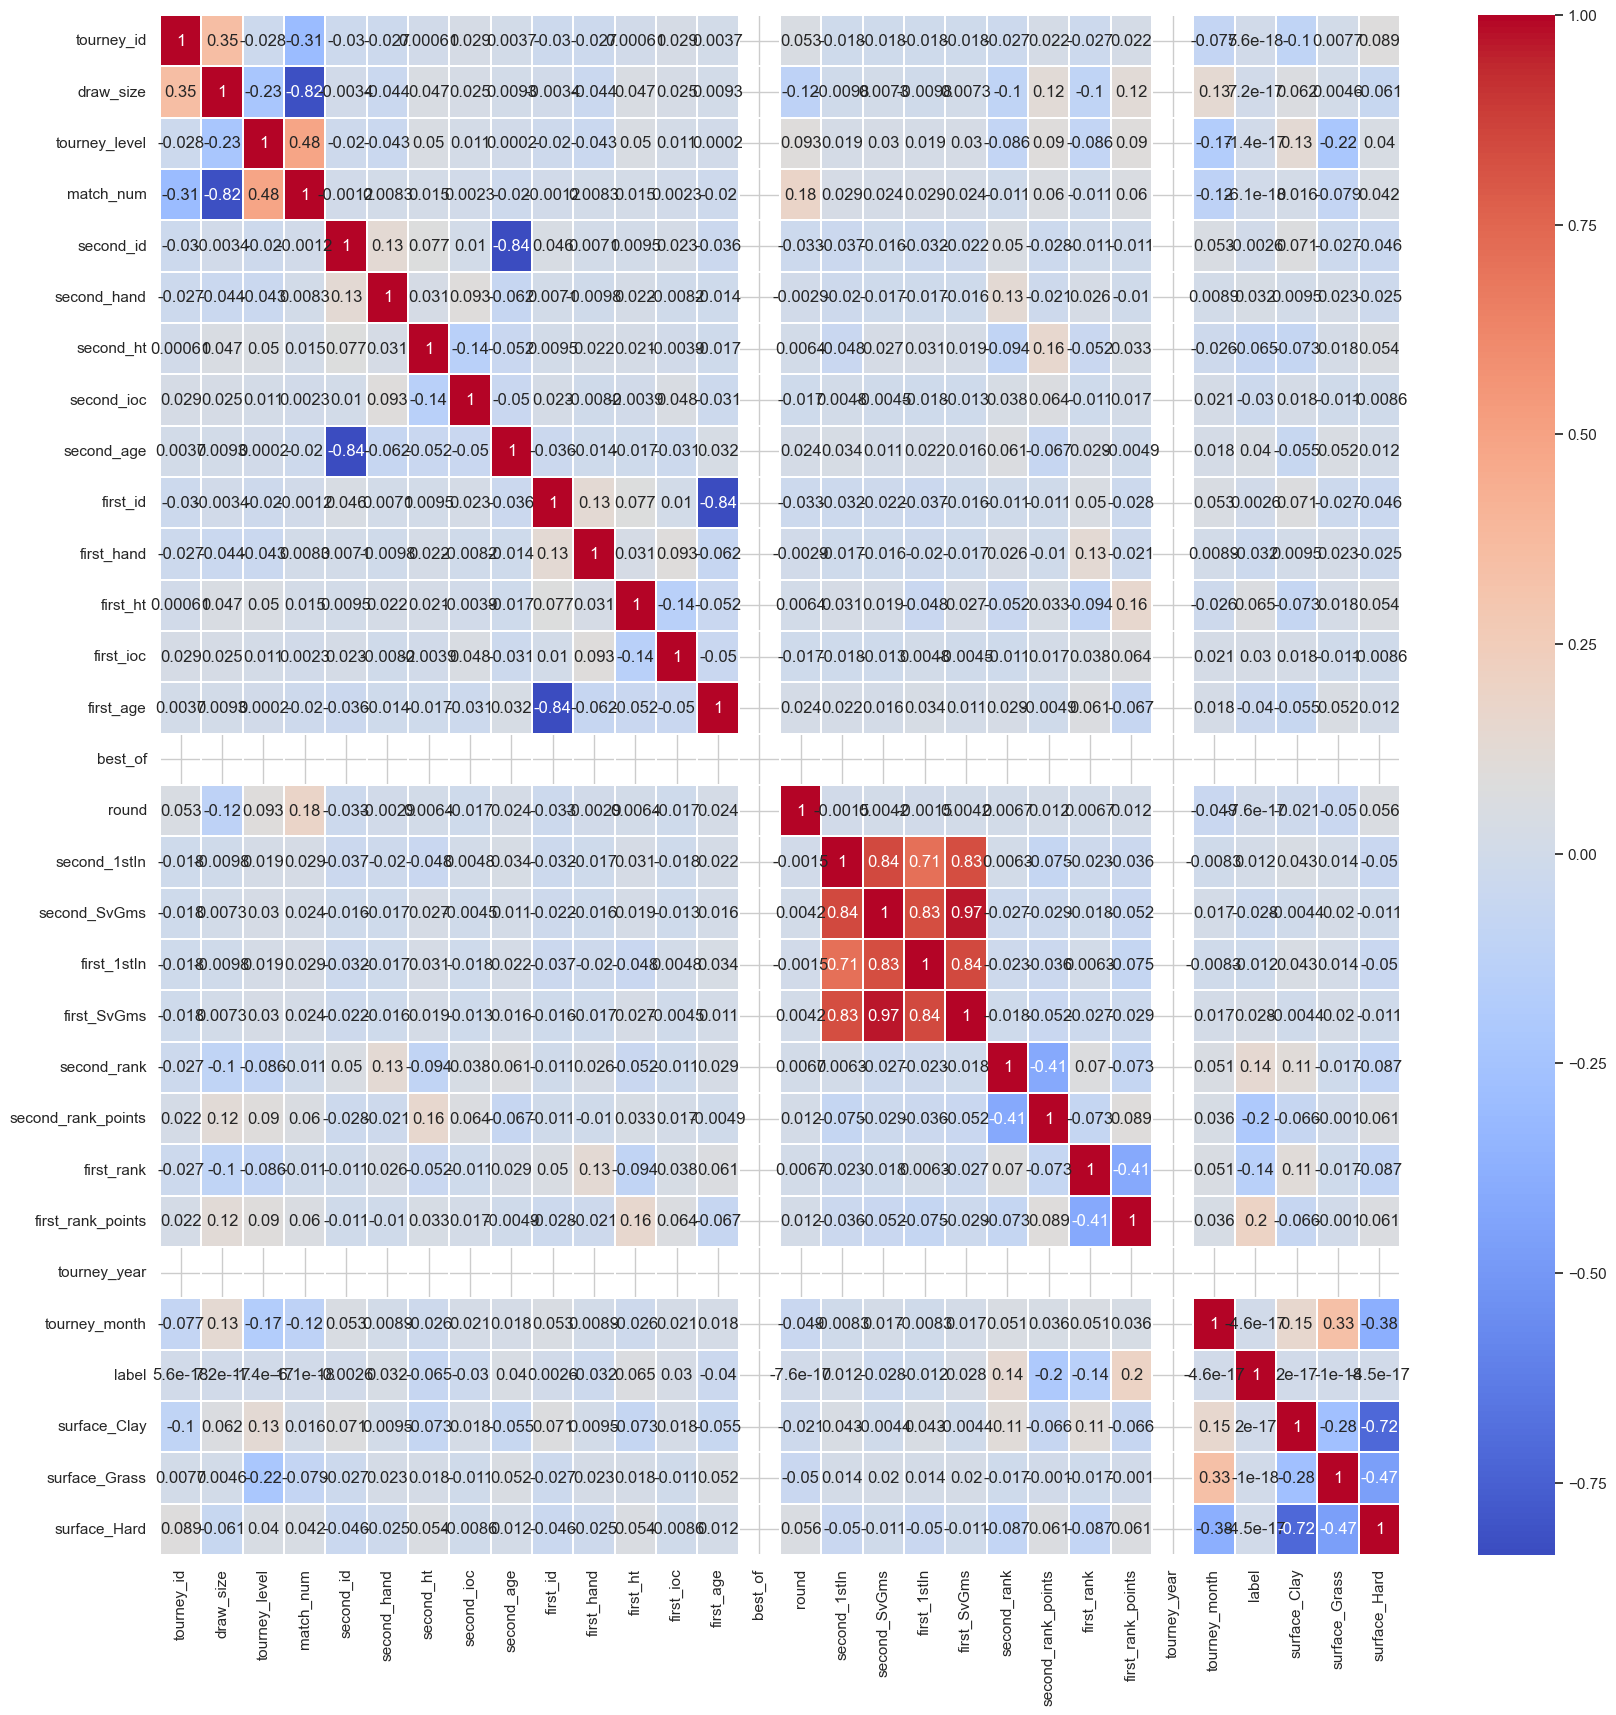

In [49]:
correlation_matrix = tennis.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot= True, linewidth=0.1, cmap= 'coolwarm')

As seen in the image, rank-related data and service performance were still the most important factors.

## Model 1 - Logistic Regression

For my model evaluations, I will primarily focus on accuracy as it provides a clear and intuitive measure of a model’s overall performance in correctly classifying outcomes. Accuracy is commonly used as a baseline metric for classification tasks, making it easy to understand and communicate. 

Additionally, I will pay close attention to false positives, as incorrectly predicting a winner can create a misleading impression of a player's performance. 

I am starting with a logistic regression model because it is a simple yet effective choice for binary classification tasks.








In [180]:
y = tennis['label']
X = tennis.drop(columns=['label'])
dummy_classifier = DummyClassifier()
dummy_classifier.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [181]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

y_pred = logistic_regression.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_mat)
print(f'Baseline Accuracy: {dummy_classifier.score(X, y):.2f}')


Accuracy: 0.64
Confusion Matrix:
[[254 136]
 [153 271]]
Baseline Accuracy: 0.50


In [55]:
coefficients = logistic_regression.coef_
intercept = logistic_regression.intercept_

feature_names = X_train.columns
coefficients_df = pd.DataFrame(coefficients.flatten(), index=feature_names, columns=['Coefficient'])

print(coefficients_df)
print(f"Intercept: {intercept[0]}")


                    Coefficient
tourney_id             0.013689
draw_size              0.004225
tourney_level         -0.015180
match_num              0.032308
second_id              0.067025
second_hand            0.020650
second_ht             -0.064643
second_ioc            -0.073421
second_age             0.120622
first_id              -0.029774
first_hand            -0.044207
first_ht               0.065820
first_ioc              0.066197
first_age             -0.113066
best_of                0.000000
round                 -0.021078
second_1stIn           0.062368
second_SvGms          -1.621738
first_1stIn           -0.092285
first_SvGms            1.631799
second_rank            0.191398
second_rank_points    -0.467695
first_rank            -0.237040
first_rank_points      0.460830
tourney_year           0.000000
tourney_month         -0.011525
surface_Clay           0.001243
surface_Grass         -0.002333
surface_Hard           0.000537
Intercept: -0.0254103364934446


These coefficients provide insight into the factors that influence the model the most. Similar to the heatmap, it appears that service performance and ranking-related variables have the greatest impact.








The logistic regression model achieved an accuracy of 0.64, meaning it correctly predicted the match winner 64% of the time on the test dataset. This suggests the model is moderately effective at distinguishing between winning and losing outcomes for the player.

The confusion matrix reveals that the model accurately predicted 251 wins and incorrectly predicted a win 139 times when the player lost. On the other hand, it misidentified the player’s loss 151 times but correctly predicted a loss 273 times.

While these results are decent, exploring alternative models could potentially improve performance.

## Model 2 - Decision Tree

A decision tree model is beneficial due to its interpretability and simplicity, as it mimics human decision-making by breaking down the process into a sequence of straightforward rules, making it easier to understand than logistic regression.








In [150]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Accuracy of Decision Tree: {accuracy_dt:.2f}")
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)
print('Baseline Accuracy:', dummy_clf.score(X, y))


Accuracy of Decision Tree: 0.55
Confusion Matrix for Decision Tree:
[[219 171]
 [196 228]]
Baseline Accuracy: 0.5


The decision tree model achieves an accuracy of 0.55, which is lower than the logistic regression model's performance. This decrease could be due to the decision tree's tendency to overfit, particularly if the depth of the tree is not well-constrained. Overfitting might cause the model to perform well on training data but poorly on new, unseen data, which could explain the reduced accuracy on the WTA matches dataset. The confusion matrix shows a significant number of false positives (171) and false negatives (196), suggesting that the decision tree may be overfitting to noise in the training data rather than capturing generalizable patterns. The 171 false positive predictions of a win are higher than the 139 false positives from the logistic regression model.








## Model 3 - Random Forest

As a result, I have decided to use a random forest model, which enhances classification accuracy by creating multiple decision trees. This ensemble method leverages the strengths of several decision trees, producing more reliable and accurate predictions.








In [144]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train, y_train)
RF_preds = RF_model.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, RF_preds))
print('Accuracy: ', accuracy_score(y_test, RF_preds))
print('Baseline Accuracy:', dummy_clf.score(X, y))


Confusion Matrix:
[[253 137]
 [169 255]]
Accuracy:  0.6240786240786241
Baseline Accuracy: 0.5


The random forest model achieves an accuracy of approximately 0.624, which is slightly worse than the logistic regression model's 0.64. This suggests that the logistic regression model outperforms the random forest in this particular instance. The reason for this could be that logistic regression may be better suited to the structure of the current dataset, possibly due to less complexity or noise in the features. It’s also possible that the data may have changed slightly over time, affecting the random forest's ability to capture the patterns as effectively as logistic regression.

While the decision tree model resulted in an accuracy of 0.55, the random forest's performance still demonstrates its robustness to overfitting, which is a common pitfall of single decision trees. The 137 false winner predictions are fewer than in the previous two models, indicating some improvement in false predictions. Nevertheless, the random forest's performance, although generally good, may not always outperform simpler models like logistic regression, depending on the characteristics of the dataset and how it changes.

## Model 4 - k-Nearest Neighbors (k-NN)

I’m now experimenting with a K-NN model to explore how a distance-based classifier performs in identifying patterns in the data by considering the similarity between instances. K-NN has the potential to improve performance by leveraging the local structure within the dataset.








In [146]:
knn = knn= KNeighborsClassifier(n_neighbors= 5)

In [147]:
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)


print(f"Accuracy of K-NN model: {accuracy_knn:.2f}")
print("Confusion Matrix of K-NN model:")
print(conf_matrix_knn)
print('Baselines:', dummy_clf.score(X, y))

Accuracy of K-NN model: 0.54
Confusion Matrix of K-NN model:
[[220 170]
 [202 222]]
Baselines: 0.5


The k-NN model yields an accuracy of 0.54, which is the lowest compared to the other models: logistic regression (0.64), decision tree (0.55), and random forest (0.62). This suggests that k-NN, may not be capturing the patterns within the WTA matches dataset as effectively as the others. The model's reliance on the proximity of data points could be less suitable for this particular dataset, possibly due to the high dimensionality, which can hinder its performance.

The confusion matrix also reveals that the k-NN model also had the worst amount of false winning predictions (170) along the decision tree's amount (171). The superior performance of the logistic regression model outperformed k-NN, likely due to its simpler, linear approach, which might be better suited for the underlying relationships in the dataset.

#### I also wanted to explore how other factors, which I previously considered to be influential, would perform within my model.








In [175]:
# Fill missing values with the average height for both first and second players
tennis['second_ht'] = tennis['second_ht'].fillna(tennis['second_ht'].mean())
tennis['first_ht'] = tennis['first_ht'].fillna(tennis['first_ht'].mean())

# Create a new feature that indicates the height difference between the winner (second player) and loser (first player)
tennis['height_diff'] = tennis['second_ht'] - tennis['first_ht']

# Prepare the data by dropping irrelevant features
X_height = tennis[['height_diff', 'second_rank', 'first_rank']]  # Include relevant features like rank, height_diff, etc.
y_height = tennis['label']  

# Train-test split
X_train_height, X_test_height, y_train_height, y_test_height = train_test_split(X_height, y_height, test_size=0.2, random_state=42)

# Create pipeline with MinMaxScaler and RandomForestClassifier
pipeline_height = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline_height.fit(X_train_height, y_train_height)

# Evaluate the accuracy
accuracy_height = pipeline_height.score(X_test_height, y_test_height)
baseline_accuracy_height = dummy_clf.score(X_height, y_height)

# Print the results
print(f'Accuracy with Height Difference as Predictor: {accuracy_height:.2f}')
print(f'Baseline Accuracy: {baseline_accuracy_height:.2f}')


Accuracy with Height Difference as Predictor: 0.60
Baseline Accuracy: 0.50



The model achieved an accuracy of 60% when predicting match outcomes using the height difference between the winner and loser, along with player rankings, as predictors. This is an improvement over the baseline accuracy of 50%, which represents random guessing or majority class prediction, showing that these features provide some predictive power beyond chance. While the 60% accuracy suggests that height difference and rankings have some influence on match outcomes, the model's performance indicates that there is still significant room for improvement. 

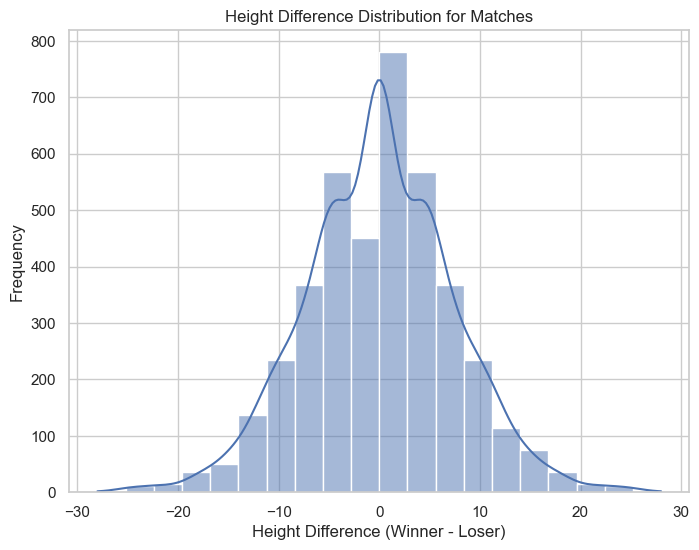

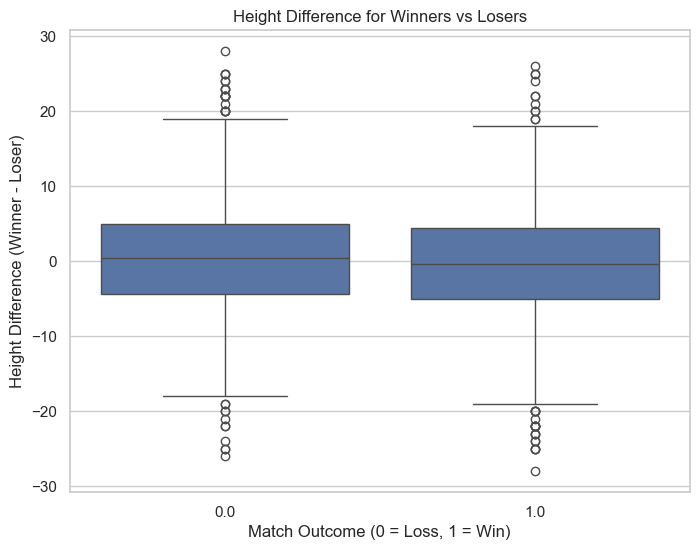

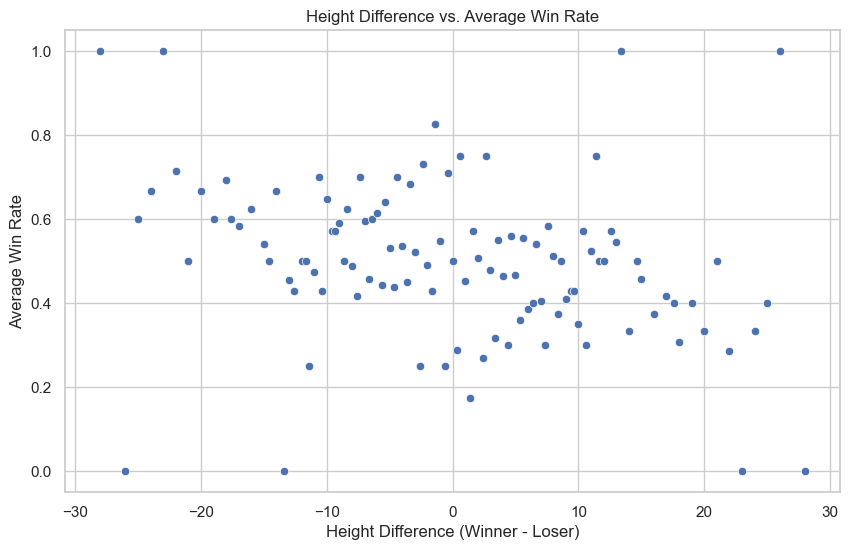

In [170]:
# Visualizing the Distribution of Height Difference for All Matches
plt.figure(figsize=(8, 6))
sns.histplot(tennis['height_diff'], kde=True, bins=20)
plt.title('Height Difference Distribution for Matches')
plt.xlabel('Height Difference (Winner - Loser)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Height Difference vs. Match Outcome (Winner vs Loser)
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='height_diff', data=tennis)
plt.title('Height Difference for Winners vs Losers')
plt.xlabel('Match Outcome (0 = Loss, 1 = Win)')
plt.ylabel('Height Difference (Winner - Loser)')
plt.show()

# Scatter plot of Height Difference vs. Win Rate
height_diff_win_rate = tennis.groupby('height_diff')['label'].mean()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=height_diff_win_rate.index, y=height_diff_win_rate.values)
plt.title('Height Difference vs. Average Win Rate')
plt.xlabel('Height Difference (Winner - Loser)')
plt.ylabel('Average Win Rate')
plt.show()


In [178]:


# Prepare the data by including height difference, player ranks, and serve statistics
X_full = tennis[['height_diff', 'second_rank', 'first_rank', 'second_1stIn', 'first_1stIn']]  # Add in first serve stat
y_full = tennis['label']  

# Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Create and train the pipeline with additional features
pipeline_full = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline_full.fit(X_train_full, y_train_full)

# Evaluate the accuracy
accuracy_full = pipeline_full.score(X_test_full, y_test_full)
baseline_accuracy_full = dummy_clf.score(X_full, y_full)

# Print the results
print(f'Accuracy with Height, Rank, and First Serve Percentage as Predictors: {accuracy_full:.2f}')
print(f'Baseline Accuracy: {baseline_accuracy_full:.2f}')


Accuracy with Height, Rank, and First Serve Percentage as Predictors: 0.58
Baseline Accuracy: 0.50


The model, which includes height difference, player ranks, and first serve percentage as predictors, achieved an accuracy of 58% when predicting match outcomes. The accuracy of 58% indicates that the selected features—height difference, rankings, and first serve statistics—provide some valuable information for predicting match outcomes, but the model still has room for improvement. While these factors contribute to the prediction, they don't fully capture the complexity of match results. 

The model with a 60% accuracy, which used height difference as a predictor, slightly outperforms the model with 58% accuracy, which incorporated height difference, player ranks, and first serve percentage. While both models show some improvement over the baseline accuracy of 50%, the addition of serve statistics and rankings in the second model resulted in a smaller increase in accuracy, suggesting that height difference alone might be a more significant predictor in this case.

#### Okay, what about serve performance, since we thought that would be a big variable before too. 


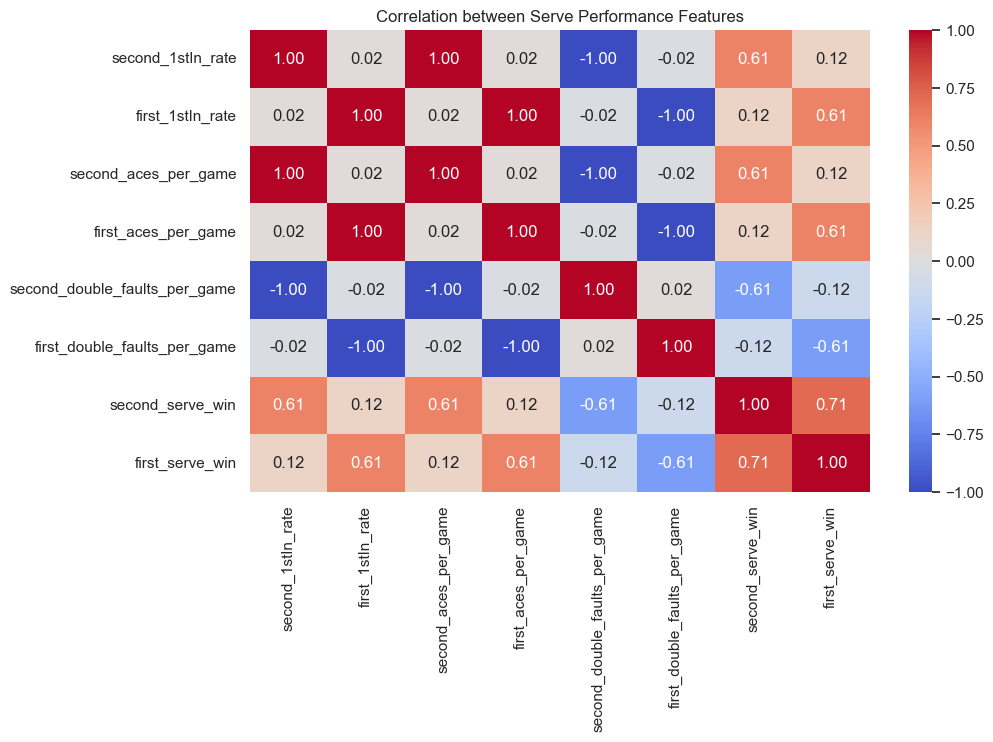

Accuracy with Serve Performance Features as Predictors: 0.59
Baseline Accuracy: 0.48


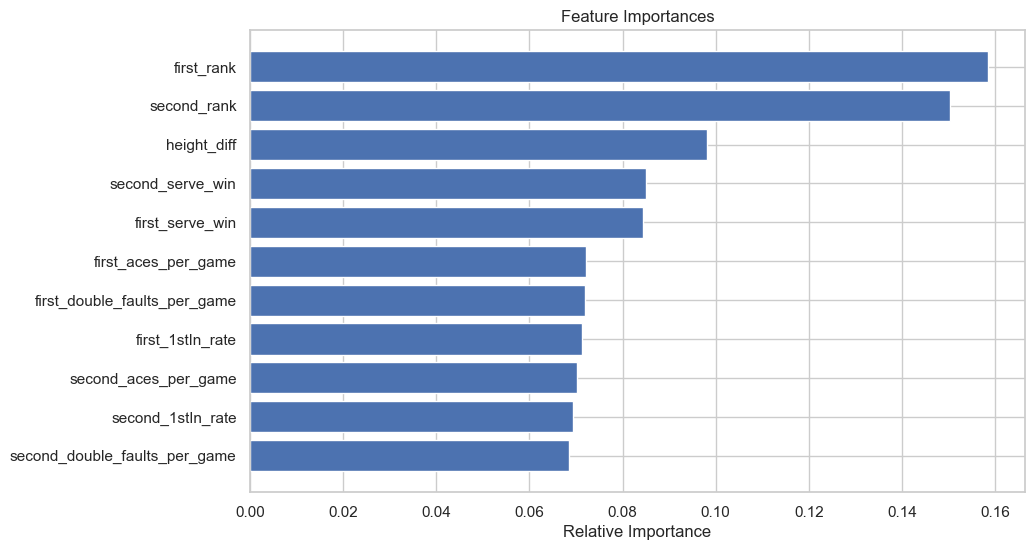

In [ ]:
# Feature Engineering for Serve Performance
# First Serve Success Rate
tennis['second_1stIn_rate'] = tennis['second_1stIn'] / tennis['second_SvGms']  # First serve success rate for the winner
tennis['first_1stIn_rate'] = tennis['first_1stIn'] / tennis['first_SvGms']  # First serve success rate for the loser

# Aces per game (calculate average aces per game for each player)
tennis['second_aces_per_game'] = tennis['second_1stIn'] / tennis['second_SvGms']  # Assuming aces are related to first serve
tennis['first_aces_per_game'] = tennis['first_1stIn'] / tennis['first_SvGms']

# Double Faults per game (Assuming double faults are inversely related to 1st serves)
tennis['second_double_faults_per_game'] = (tennis['second_SvGms'] - tennis['second_1stIn']) / tennis['second_SvGms']
tennis['first_double_faults_per_game'] = (tennis['first_SvGms'] - tennis['first_1stIn']) / tennis['first_SvGms']

# Serve win percentage (win percentage on first serves)
tennis['second_serve_win'] = tennis['second_1stIn_rate'] * tennis['second_SvGms']  # Assuming win percentage is tied to serve games
tennis['first_serve_win'] = tennis['first_1stIn_rate'] * tennis['first_SvGms']

# Check correlation of new features
plt.figure(figsize=(10, 6))
sns.heatmap(tennis[['second_1stIn_rate', 'first_1stIn_rate', 'second_aces_per_game', 'first_aces_per_game', 'second_double_faults_per_game', 'first_double_faults_per_game', 'second_serve_win', 'first_serve_win']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Serve Performance Features')
plt.show()

# Prepare the data by including serve statistics and other relevant features
X_serve = tennis[['height_diff', 'second_rank', 'first_rank', 'second_1stIn_rate', 'first_1stIn_rate', 'second_aces_per_game', 'first_aces_per_game', 'second_double_faults_per_game', 'first_double_faults_per_game', 'second_serve_win', 'first_serve_win']]
y_serve = tennis['label']  # Outcome variable (1 = win, 0 = loss)

# Train-test split
X_train_serve, X_test_serve, y_train_serve, y_test_serve = train_test_split(X_serve, y_serve, test_size=0.2, random_state=42)

# Create and train the pipeline with additional serve features
pipeline_serve = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline_serve.fit(X_train_serve, y_train_serve)

# Evaluate the accuracy
accuracy_serve = pipeline_serve.score(X_test_serve, y_test_serve)
baseline_accuracy_serve = DummyClassifier(strategy="most_frequent").fit(X_train_serve, y_train_serve).score(X_test_serve, y_test_serve)

# Print the results
print(f'Accuracy with Serve Performance Features as Predictors: {accuracy_serve:.2f}')
print(f'Baseline Accuracy: {baseline_accuracy_serve:.2f}')

# Visualize the most important features
importances = pipeline_serve.named_steps['classifier'].feature_importances_
features = X_serve.columns
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


The model using serve performance features achieved an accuracy of 0.59, a noticeable improvement over the baseline accuracy of 0.48. This suggests that incorporating serve-related metrics, such as first serve percentage, aces, and double faults, positively influences the model's ability to predict match outcomes. The increase in accuracy indicates that serve performance is a valuable predictor, as the model performs better than random guessing (represented by the baseline). 

The feature importance graph at the bottom highlights the most significant factors in the model. The top two most important features were the loser and winner ranks, followed by height_diff in third place. The next eight most important features were all related to serve performance. Given the large number of relevant and important serve-related variables, I expected this would compound and have a substantial impact on the model’s performance. However, this did not result in a significant improvement.

#### I then started to consider whether incorporating rank as a prerequisite would benefit my program.
Rank is likely the most important factor because it reflects players with the most wins, making it a strong predictor for future games. I wanted to test whether focusing on top players would simplify my model's predictions. 

To do this, I plan to trim the dataset to include only top-ranked players. I will then create a pipeline and apply the random forest model, which performed the best in previous evaluations.








## Model 5A - Predicting Using the Top 10

In [151]:
tennis_two = tennis[(tennis.first_rank <= 10) | (tennis.second_rank <=10)]
X_two = tennis_two.drop('label', axis=1)
y_two = tennis_two['label']
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two, y_two, test_size=0.2, random_state=42)

In [153]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline.fit(X_train_two, y_train_two)
accuracy = pipeline.score(X_test_two, y_test_two)
baseline_accuracy = dummy_clf.score(X_two, y_two)
print(f'Accuracy: {accuracy:.2f}')
print(f'Baseline Accuracy: {baseline_accuracy:.2f}')

Accuracy: 0.70
Baseline Accuracy: 0.50


This result clearly shows that the player with a higher ranking is more likely to win a match. Our model performs significantly better when focusing on top-ranked players.








#### Why not test it further and look at the elite players?

## Model 5B - Predicting Using the Top 5

In [154]:
tennis_elite = tennis[(tennis.first_rank <= 5) | (tennis.second_rank <=5)]

In [155]:
X_elite = tennis_elite.drop('label', axis=1)
y_elite = tennis_elite['label']
X_train_elite, X_test_elite, y_train_elite, y_test_elite = train_test_split(X_elite, y_elite, test_size=0.2, random_state=42)

In [161]:
pipeline.fit(X_train_elite, y_train_elite)

pipeline.score(X_test_elite, y_test_elite)
print('Accuracy: ', pipeline.score(X_test_elite, y_test_elite))
print('Baselines:', dummy_clf.score(X_elite, y_elite))

Accuracy:  0.7619047619047619
Baselines: 0.5


A similar-sized increase makes it evident that the ranking of a player is the most important factor when predicting victories.

## Post Analysis/Summary

The data set shows that a woman's tennis match is determined by several factors, with the most important ones being height, serve performance, and ranking. Of these, ranking stands out as the most important determinant of match outcomes. To all stakeholders in women's tennis, ranking should be the main factor of interest when one has to predict the winner of a match, second to height and serve performance.

Overall, the analysis showed that player ranking and ranking points are the most important features for predicting match outcomes. Among the models, the logistic regression model performed better because of its simplicity and its capability to explain the linear relationships between the rankings and the match results. Unlike other complex models, it identified the most important predictors without overfitting, making it the most reliable for this dataset.



## Next Steps/Improvements

To improve the model, I wish I had access to more years of matches. I didn't have access to matches played at the beginning of the 20th century, and having access to them would have provided a great amount of insight. Additionally, I wish I had access to more granular data such as amount of time spent training before a match. Such a factor would have a profound impact on the outcome of the match and would provide a more holistic view of a player's performance. Lastly, experimenting with features like breakpoints could further refine the model and provide deeper insights into match outcomes.